# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Loading data set

In [2]:
mnist = tf.keras.datasets.mnist
(X_train1,y_train1),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train1.shape

(60000, 28, 28)

In [4]:
X_valid = X_train1[:6000]/255
y_valid = y_train1[:6000]
X_train = X_train1[6000:]/255
y_train = y_train1[6000:]

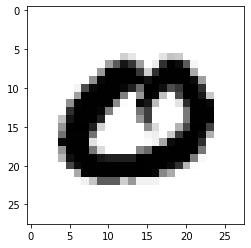

In [5]:
plt.imshow(X_train[2019],cmap="binary")
plt.show()

# Defining Layers to neural network

In [8]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(500, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(250, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(50, activation="relu",name="hiddenLayer3"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model = tf.keras.models.Sequential(LAYERS)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 500)               392500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 250)               125250    
_________________________________________________________________
hiddenLayer3 (Dense)         (None, 50)                12550     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                510       
Total params: 530,810
Trainable params: 530,810
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="SGD",metrics=['accuracy'])

In [11]:
log = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
1688/1688 [==============================] - 9s 4ms/step - loss: 0.9748 - accuracy: 0.7347 - val_loss: 0.2617 - val_accuracy: 0.9263
Epoch 2/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2690 - accuracy: 0.9223 - val_loss: 0.2056 - val_accuracy: 0.9407
Epoch 3/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1977 - accuracy: 0.9419 - val_loss: 0.1621 - val_accuracy: 0.9533
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1631 - accuracy: 0.9533 - val_loss: 0.1445 - val_accuracy: 0.9575
Epoch 5/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1316 - accuracy: 0.9612 - val_loss: 0.1241 - val_accuracy: 0.9642
Epoch 6/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1125 - accuracy: 0.9673 - val_loss: 0.1172 - val_accuracy: 0.9668
Epoch 7/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0976 - accuracy: 0.9709 - val_loss: 0.1152 - val_accuracy:

In [13]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at : \n{model_path}")
    return model_path

In [14]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at : 
SAVED_MODELS/Model_2021_04_06_13_31_47_.h5


In [16]:
log.params

{'epochs': 50, 'steps': 1688, 'verbose': 1}

# Model Evaluation

In [17]:
pd.DataFrame(log.history)

,loss,accuracy,val_loss,val_accuracy
0,0.556579,0.850741,0.261700,0.926333
1,0.247157,0.927389,0.205564,0.940667
2,0.192122,0.943685,0.162073,0.953333
3,0.156945,0.954778,0.144453,0.957500
4,0.132435,0.961370,0.124126,0.964167
5,0.113686,0.966926,0.117166,0.966833
6,0.098452,0.971333,0.115236,0.964500
7,0.086152,0.975667,0.094875,0.971333
8,0.075633,0.978093,0.094344,0.972667
9,0.066944,0.980667,0.088038,0.972167


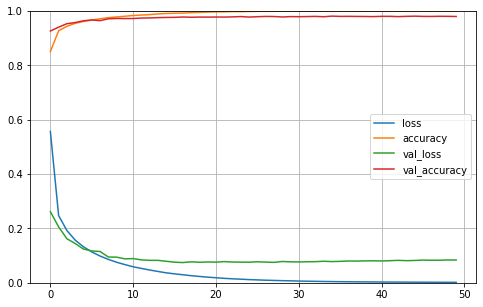

In [18]:
pd.DataFrame(log.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 20.1336 - accuracy: 0.9752


[20.1335506439209, 0.9751999974250793]

In [22]:
X_new = X_test[123:127]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([6, 7, 9, 0])

In [24]:
y_test_smple = y_test[123:127]

# Model Testing

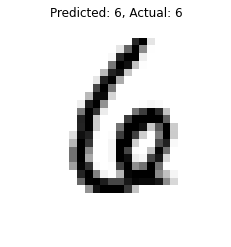

------------------------------------------------------------


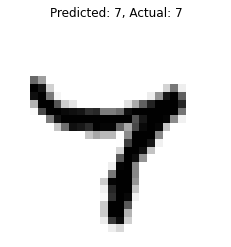

------------------------------------------------------------


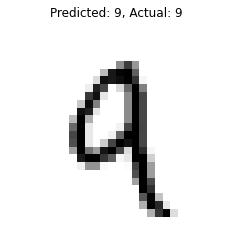

------------------------------------------------------------


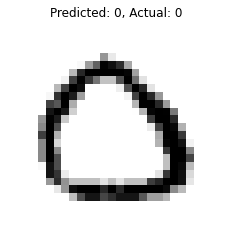

------------------------------------------------------------


In [25]:
for data, pred, actual in zip(X_new, y_pred, y_test_smple):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)